In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving New Carbonate environment-3-classes.xlsx to New Carbonate environment-3-classes.xlsx


In [3]:
file_name_1 = "New Carbonate environment-3-classes.xlsx"
df = pd.read_excel(file_name_1)

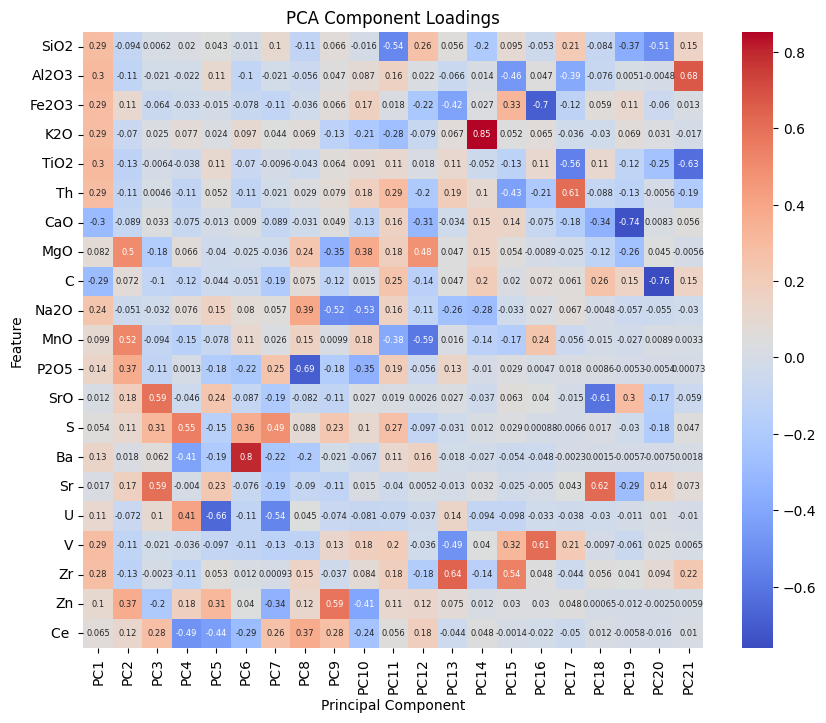

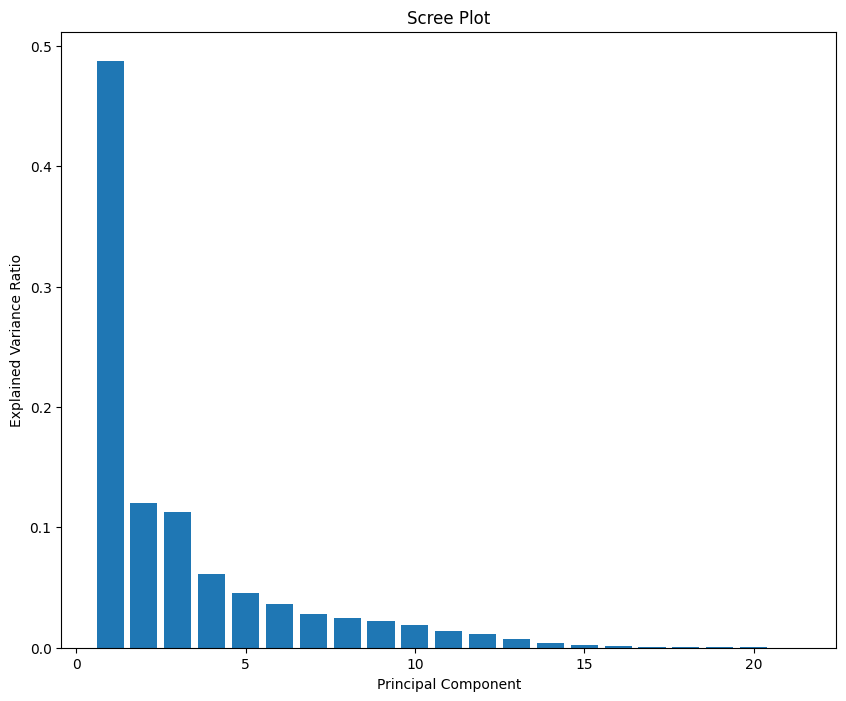

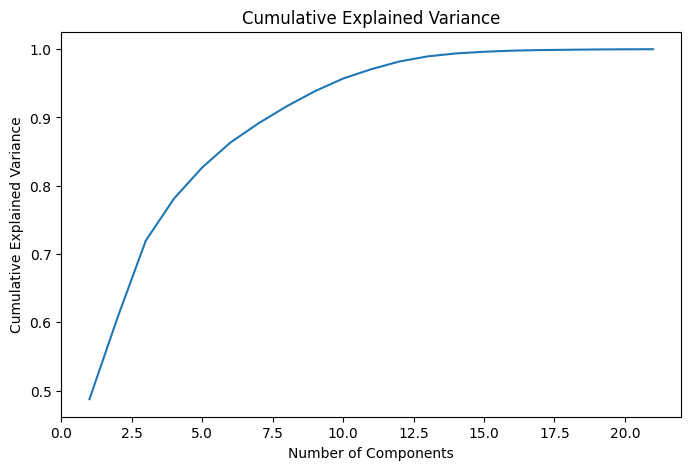

In [6]:
X = df[df.columns[:-1]]  # assuming all columns except the last one are features
y = df['Environment']  # the last column is the 'Environment' class
# Standardizing the features
X = StandardScaler().fit_transform(X)
# PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
# Heatmap for loadings
plt.figure(figsize=(10, 8))
sns.heatmap(pca.components_.T, cmap='coolwarm', annot=True,annot_kws={"size": 6},
            yticklabels=df.columns[:-1],
            xticklabels=[f"PC{i+1}" for i in range(len(pca.components_))])
plt.title('PCA Component Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()
# Scree plot
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

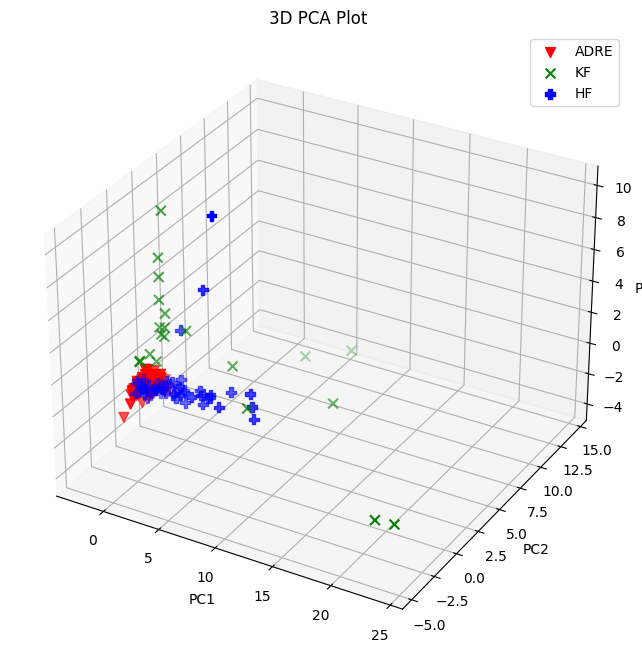

In [7]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame
# X = df.drop('Environment', axis=1).values  # Feature values
# y = df['Environment'].values  # Categories

# Replace infinite values with NaN and impute missing values
X = np.nan_to_num(X, nan=np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_imputed)

# Perform PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)

# Create a DataFrame with the PCA results and the categories
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
pca_df['Environment'] = y

# Define category colors
category_colors = {
    'ADRE': 'r',  # Red
    'KF': 'g',    # Green
    'HF': 'b'     # Blue
}

# Define category markers
category_markers = {
    'ADRE': 'v',  # Triangle down
    'KF': 'x',    # Cross
    'HF': 'P'     # Plus (filled plus sign)
}

# Plot each category with its corresponding marker
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for category, marker in category_markers.items():
    indices_to_keep = pca_df['Environment'] == category
    ax.scatter(pca_df.loc[indices_to_keep, 'PC1'],
               pca_df.loc[indices_to_keep, 'PC2'],
               pca_df.loc[indices_to_keep, 'PC3'],
               c=category_colors[category],
               marker=marker,  # Use the specified marker for the category
               s=50,
               label=category)

# Legend
ax.legend()

# Axes labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot')

# Show plot
plt.show()

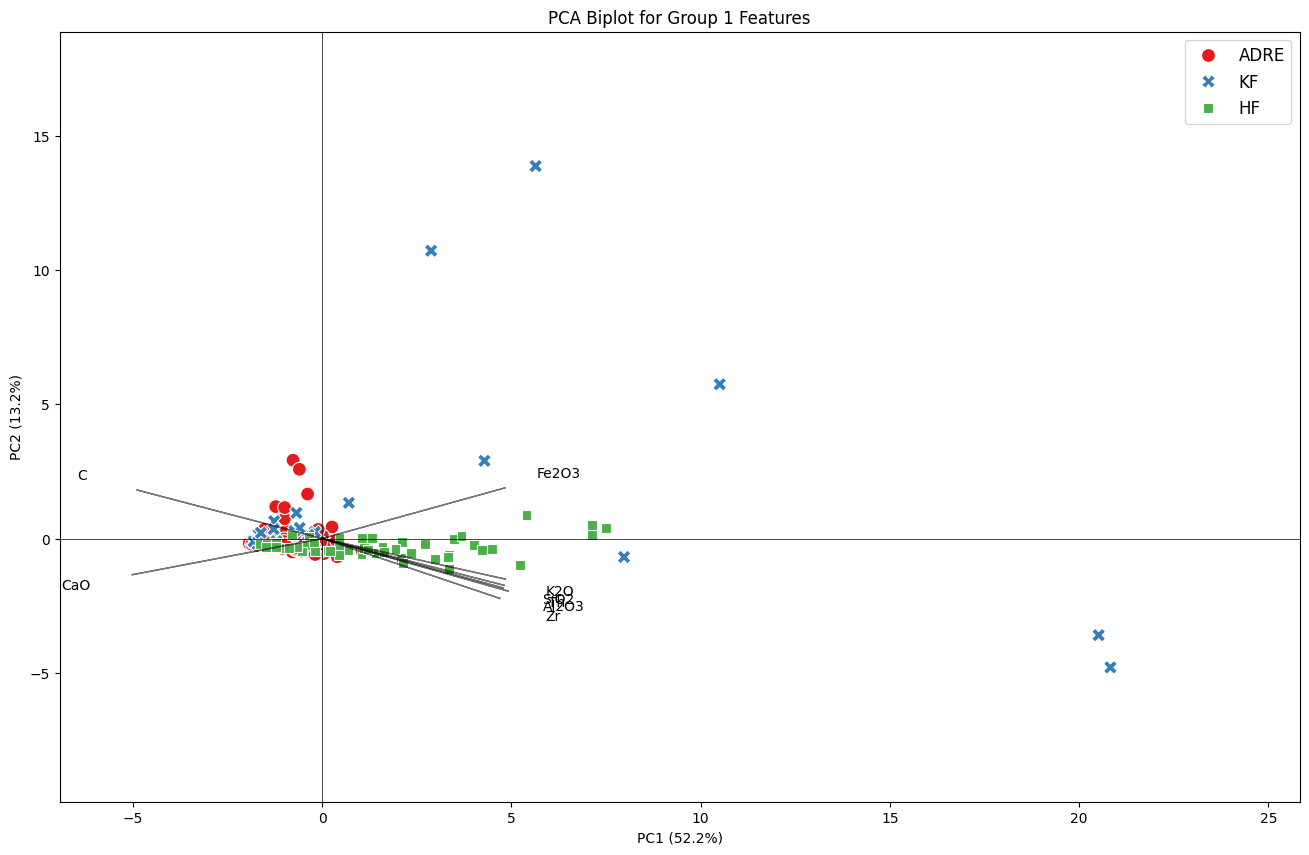

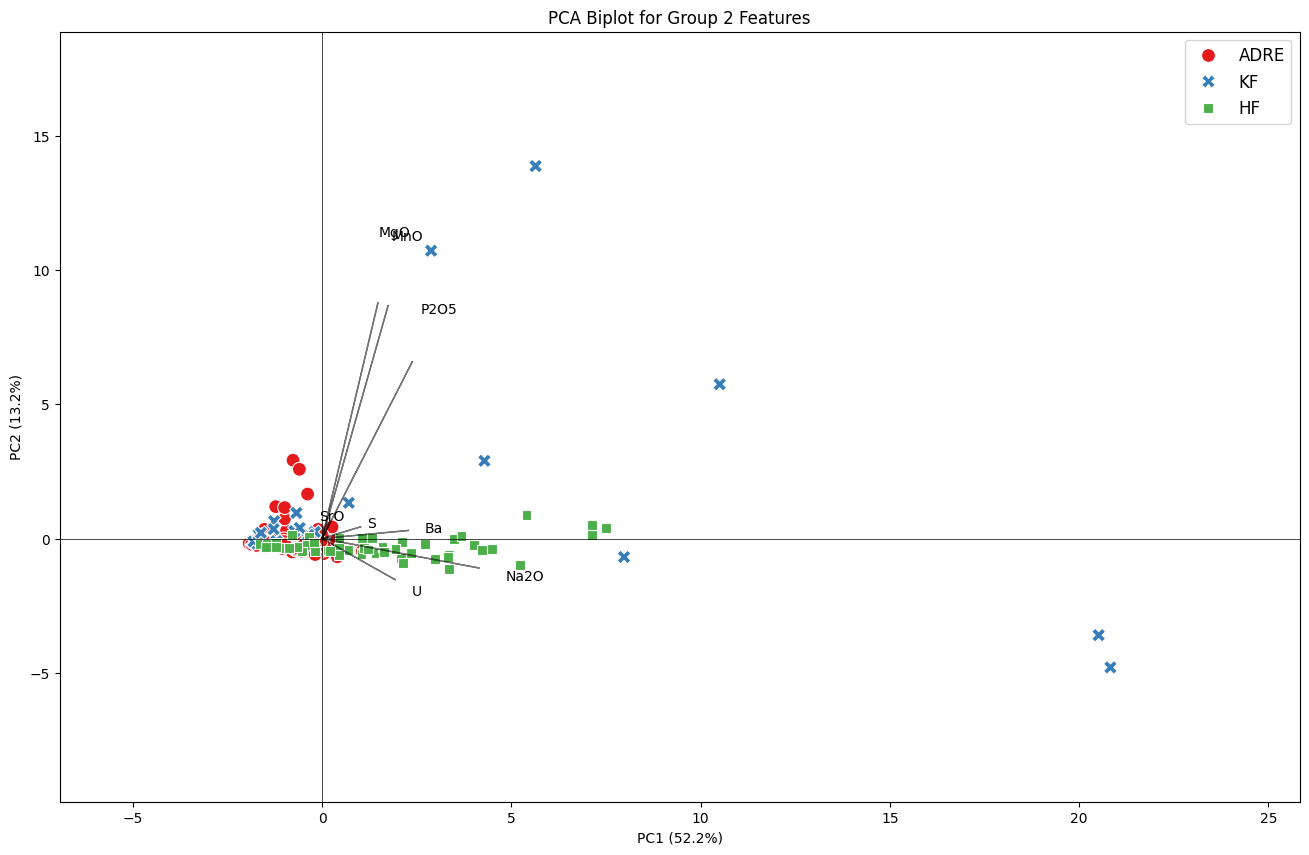

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Define feature groups
features_group1 = ['SiO2', 'Al2O3', 'Fe2O3', 'K2O', 'Th', 'CaO', 'Zr', 'C']
features_group2 = ['MgO', 'Na2O', 'MnO', 'P2O5', 'SrO', 'S', 'Ba', 'U']

# Combine both groups for PCA
combined_features = features_group1 + features_group2
X_combined = df[combined_features]

# Standardize the combined features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Apply PCA to the combined features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_combined_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, df['Environment']], axis=1)

def plot_pca_biplot(features, title, components):
    plt.figure(figsize=(16, 10))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Environment', style='Environment', palette='Set1', s=100)

    # Adding vectors for each feature
    scaling_factor = 15  # Increased scaling factor
    for i, feature in enumerate(features):
        component = components[i]
        plt.arrow(0, 0, component[0]*scaling_factor, component[1]*scaling_factor, color='black', alpha=0.5, width=0.005, head_width=0.02)
        plt.text(component[0]*scaling_factor*1.3, component[1]*scaling_factor*1.3, feature, color='black', ha='center', va='center', fontsize=10)

    # Adjusting the plot limits based on the principal components range
    plt.xlim(min(pca_df['PC1']) - 5, max(pca_df['PC1']) + 5)
    plt.ylim(min(pca_df['PC2']) - 5, max(pca_df['PC2']) + 5)

    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    plt.title(title)
    plt.grid(False)
    plt.legend(loc='upper right', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

# Plot the first group of features
plot_pca_biplot(features_group1, 'PCA Biplot for Group 1 Features', pca.components_.T[:len(features_group1)])

# Plot the second group of features
plot_pca_biplot(features_group2, 'PCA Biplot for Group 2 Features', pca.components_.T[len(features_group1):])